In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1) #just to make your output same as mine

#### Create sample X and Y variables

In [4]:
train_X = np.linspace(-1, 1, 101)
train_Y = 10 * train_X + np.random.randn(*train_X.shape) * 0.64

#### Visualize x vs y

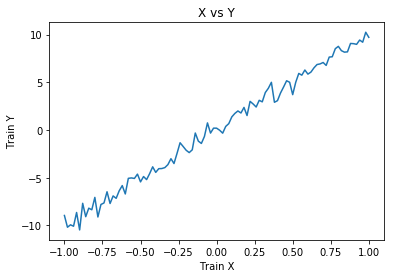

In [5]:
plt.plot(train_X,train_Y)
plt.title("X vs Y")
plt.xlabel("Train X")
plt.ylabel("Train Y")
plt.show()

### Model 

Parameters

In [6]:
learning_rate = 0.01
training_epochs = 200
print_cost = True

tf graph input

In [7]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

set model parameters

In [8]:
W = tf.get_variable(name="W",shape=[1,],dtype=tf.float32)
b = tf.get_variable(name="b",shape=[1,],dtype=tf.float32)

linear model

In [9]:
def model(X,W,b):
    return tf.add(tf.multiply(X,W),b)

In [10]:
Y_hat = model(X,W,b)

Cost function

In [11]:
cost = tf.reduce_mean(tf.square(Y_hat-Y))

optimizer

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

Epoch: 0 cost=12.71002 w= [4.6397643] b= [1.5450189]
Epoch: 20 cost=0.31624 w= [10.05694] b= [0.03284613]
Epoch: 40 cost=0.31624 w= [10.056944] b= [0.03284435]
Epoch: 60 cost=0.31624 w= [10.056944] b= [0.03284435]
Epoch: 80 cost=0.31624 w= [10.056944] b= [0.03284435]
Epoch: 100 cost=0.31624 w= [10.056944] b= [0.03284435]
Epoch: 120 cost=0.31624 w= [10.056944] b= [0.03284435]
Epoch: 140 cost=0.31624 w= [10.056944] b= [0.03284435]
Epoch: 160 cost=0.31624 w= [10.056944] b= [0.03284435]
Epoch: 180 cost=0.31624 w= [10.056944] b= [0.03284435]
Optimization done!


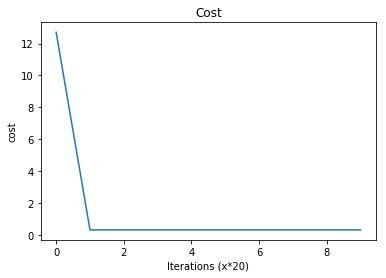

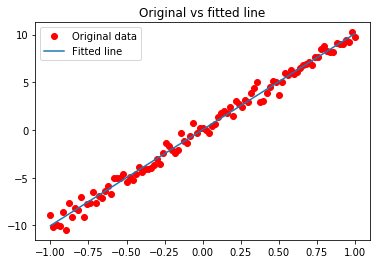

In [14]:
costs = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        
        if print_cost and epoch % 20 == 0:
            c = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            costs.append(c)
            print("Epoch:",'%d' % epoch, "cost={:.5f}".format(c),\
                 "w=",sess.run(W),"b=",sess.run(b))
            
    print("Optimization done!")
    plt.plot(costs)
    plt.title("Cost")
    plt.xlabel("Iterations (x*20)")
    plt.ylabel("cost")
    plt.show()
        
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.title("Original vs fitted line")
    plt.show()